# Classification of iris data set using various machine learning techniques

## Libraries

In [40]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.datasets import load_iris

##### Preprocessing and Model Evaluation #####
from sklearn import preprocessing, metrics
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, RocCurveDisplay


##### ML Algorithms #####
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.multiclass import OneVsRestClassifier


import warnings
warnings.simplefilter("ignore")

## Data Reading from CSV

In [41]:
#Import iris dataset
data_iris = pd.read_csv("iris.csv")
raw_df = data_iris

In [42]:
raw_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [43]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
#checking for null values
raw_df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [45]:
raw_df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [46]:
raw_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [47]:
raw_copy = raw_df.copy()

In [48]:
y = raw_df.pop('variety')
X = raw_df.copy()

In [49]:
y.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [50]:
variety_mapping = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}
y = y.replace(variety_mapping)

In [51]:
#  splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
classifier = LogisticRegression(random_state=0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Extending Data Size

In [52]:
## adding further rows to the dataset
for i in range(0, 1000):
    s_l = round(random.SystemRandom().uniform(min(X.iloc[:,0]), max(X.iloc[:,0])), 1)
    s_w = round(random.SystemRandom().uniform(min(X.iloc[:,1]), max(X.iloc[:,1])), 1)
    p_l = round(random.SystemRandom().uniform(min(X.iloc[:,2]), max(X.iloc[:,2])), 1)
    p_w = round(random.SystemRandom().uniform(min(X.iloc[:,3]), max(X.iloc[:,3])), 1)
    rand_row = [s_l, s_w, p_l, p_w]
    X_new_row = {'sepal.length':s_l, 'sepal.width':s_w, 'petal.length':p_l, 'petal.width':p_w}
    _new_row = {'sepal.length':s_l, 'sepal.width':s_w, 'petal.length':p_l, 'petal.width':p_w, 'variety': pd.Series(classifier.predict([rand_row]))}
    
    #append row to the dataframe
    X = X.append(X_new_row, ignore_index=True)
    y = y.append(pd.Series(classifier.predict([rand_row])))

In [53]:
# converting categorical output to numerical binary format
y_lb = label_binarize(y, classes=[0, 1, 2])
n_classes = y_lb.shape[1]

# adding noise to the dataset
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
extended_X = np.c_[X, random_state.randn(n_samples, 50 * n_features)]

In [54]:
pd.DataFrame(extended_X)

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,5.1,3.5,1.4,0.2,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,...,-1.292857,0.267051,-0.039283,-1.168093,0.523277,-0.171546,0.771791,0.823504,2.163236,1.336528
1,4.9,3.0,1.4,0.2,-0.369182,-0.239379,1.099660,0.655264,0.640132,-1.616956,...,0.567290,-0.222675,-0.353432,-1.616474,-0.291837,-0.761492,0.857924,1.141102,1.466579,0.852552
2,4.7,3.2,1.3,0.2,-0.598654,-1.115897,0.766663,0.356293,-1.768538,0.355482,...,0.543312,0.439043,-0.219541,-1.084037,0.351780,0.379236,-0.470033,-0.216731,-0.930157,-0.178589
3,4.6,3.1,1.5,0.2,-1.550429,0.417319,-0.944368,0.238103,-1.405963,-0.590058,...,-0.757871,-0.050084,-0.897401,1.312470,-0.858972,-0.898942,0.074586,-1.077099,-0.424663,-0.829965
4,5.0,3.6,1.4,0.2,1.411172,0.785804,-0.057470,-0.391217,0.940918,0.405204,...,0.441033,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.7,3.3,4.1,2.1,1.899791,2.763035,0.462613,0.361787,-1.289620,0.608884,...,0.871042,1.698138,-0.467728,0.331682,0.500122,-0.780593,-0.270602,0.636490,-1.021643,0.682534
1146,4.6,2.9,2.5,1.8,-0.381008,0.947886,1.218911,0.281695,0.253920,0.536261,...,0.478202,-0.470090,0.957163,1.025170,-1.026484,0.030135,0.625951,-0.408760,-0.615159,0.050009
1147,6.1,4.0,3.6,1.5,-0.972386,-0.171880,-0.031361,-0.276752,-0.885187,1.026050,...,0.046985,1.927918,-0.290007,2.034255,0.697449,-0.883740,-1.214188,0.886593,-0.690543,0.558223
1148,5.6,3.3,1.5,0.3,-0.809031,-1.309833,-0.837754,-1.460418,-1.288710,-0.788351,...,-0.949368,1.217803,-0.177435,-1.958653,-1.232247,0.561128,0.686226,-0.781959,1.147498,0.084453


In [55]:
# shuffle and split training and test sets with 80/20 percentage
X_train, X_test, y_train, y_test = train_test_split(extended_X, y_lb, test_size=0.2)

In [56]:
X_train.shape, X_test.shape # checking shape of the data

((920, 204), (230, 204))

In [57]:
def roc_accuracies(y_score): # drawing out ROC graph for all the models
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.figure(figsize=(12, 7))

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Comparing every class of [0,1,2] with each other")
    plt.legend(loc="lower right")
    plt.show()

## Multi Class Classification
### Did this through labelizer and every class got predicted separately.

### Support Vector Machine

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        65
           1       0.53      0.48      0.50       101
           2       0.80      0.70      0.75        64

   micro avg       0.70      0.66      0.68       230
   macro avg       0.72      0.70      0.71       230
weighted avg       0.69      0.66      0.68       230
 samples avg       0.58      0.66      0.61       230



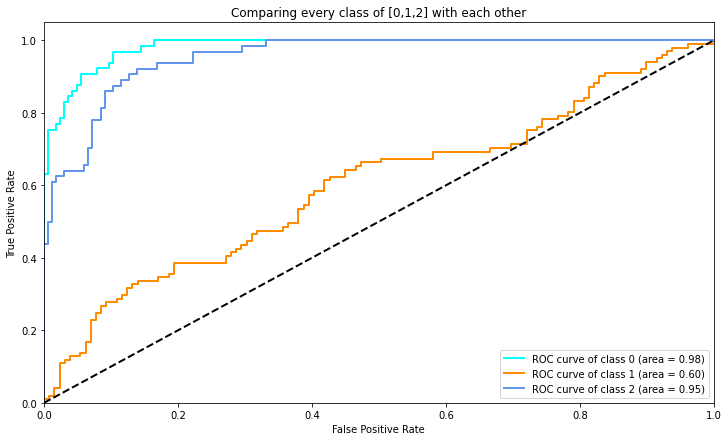

In [58]:
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=0)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print(classification_report(y_test, classifier.predict(X_test)))
roc_accuracies(y_score)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        65
           1       0.56      0.54      0.55       101
           2       0.85      0.81      0.83        64

   micro avg       0.73      0.73      0.73       230
   macro avg       0.76      0.76      0.76       230
weighted avg       0.72      0.73      0.72       230
 samples avg       0.63      0.73      0.67       230



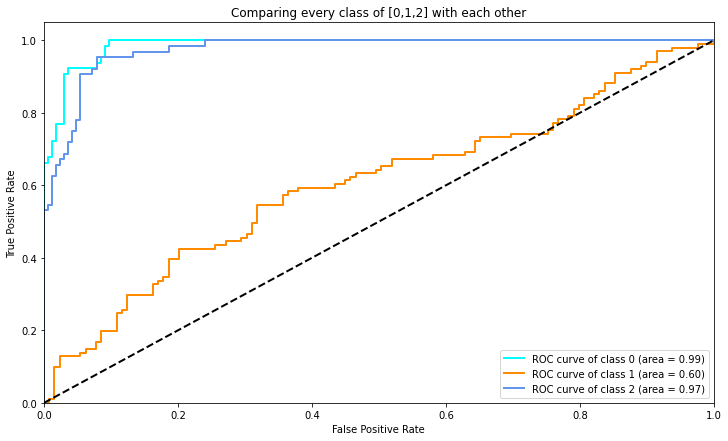

In [59]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    LogisticRegression(random_state=0, multi_class='auto')
)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print(classification_report(y_test, classifier.predict(X_test)))
roc_accuracies(y_score)

### Accuracies comparison of these algorithms
* Naive Bayes
* Random Forest
* KNN
* SVM
* Logisitc Regression

In [60]:
X_train, X_test, y_train, y_test = train_test_split(extended_X, y, random_state = 0)

In [61]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

print(gs_NB.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.012328467394420659}


In [62]:
param_grid = {'max_depth': [10, 15, 20], 'min_samples_split': [10, 15, 20]}
base_estimator = RandomForestClassifier(random_state=0)
sh = GridSearchCV(base_estimator, param_grid, cv=5).fit(X_train, y_train)
sh.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=20, random_state=0)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(extended_X, y, random_state = 0)
models = [
    GaussianNB(var_smoothing = 1.0),
    RandomForestClassifier(max_depth=20, min_samples_split=15, random_state=0),
    KNeighborsClassifier(n_neighbors = 7),
    svm.SVC(kernel = 'linear', C = 1),
    LogisticRegression(random_state=0)
]
model_names = ['Naive Bayes', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression']

In [64]:
accuracies = []
conf_mt = []
for i in range(0, len(models)):
    print('---------------' + model_names[i] + '---------------')
    models[i].fit(X_train, y_train)
    print(confusion_matrix(y_test, models[i].predict(X_test)))
    conf_mt.append(confusion_matrix(y_test, models[i].predict(X_test)))
    print('Training Accuracy: ' + str(models[i].score(X_train, y_train)))
    print('Testing Accuracy: ' + str(models[i].score(X_test, y_test)))
    accuracies.append(models[i].score(X_test, y_test))

---------------Naive Bayes---------------
[[75 10  0]
 [15 98 16]
 [ 0 13 61]]
Training Accuracy: 0.9025522041763341
Testing Accuracy: 0.8125
---------------Random Forest---------------
[[ 81   4   0]
 [  7 116   6]
 [  0  28  46]]
Training Accuracy: 1.0
Testing Accuracy: 0.84375
---------------KNN---------------
[[64 20  1]
 [42 58 29]
 [ 4 33 37]]
Training Accuracy: 0.7204176334106729
Testing Accuracy: 0.5520833333333334
---------------SVM---------------
[[ 78   7   0]
 [ 11 101  17]
 [  0  17  57]]
Training Accuracy: 1.0
Testing Accuracy: 0.8194444444444444
---------------Logistic Regression---------------
[[72 13  0]
 [17 98 14]
 [ 0 15 59]]
Training Accuracy: 1.0
Testing Accuracy: 0.7951388888888888


In [65]:
accuracies = [round(100 * accuracy, 2) for accuracy in accuracies]
w_accuracies = [100 - accuracy for accuracy in accuracies]

In [66]:
accuracies

[81.25, 84.38, 55.21, 81.94, 79.51]

### Comparison of Logistic Regression and Naive Bayes

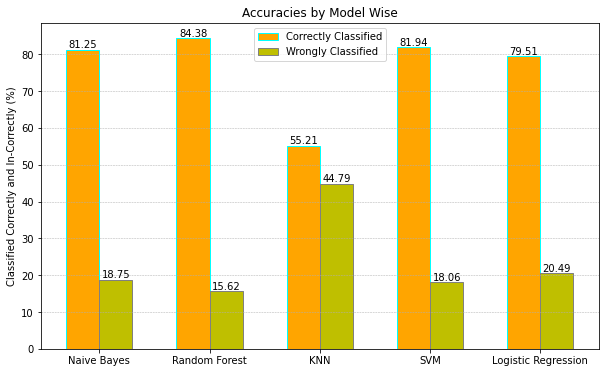

In [67]:
barWidth = 0.3
fig, ax = plt.subplots(figsize =(10, 6))
 
br1 = np.arange(len(accuracies))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, accuracies, color ='orange', width = barWidth,
        edgecolor ='aqua', label ='Correctly Classified')
plt.bar(br2, w_accuracies, color ='y', width = barWidth,
        edgecolor ='grey', label ='Wrongly Classified')

plt.xticks(br1 + barWidth / 2, model_names)
plt.ylabel('Classified Correctly and In-Correctly (%)')
plt.title('Accuracies by Model Wise')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [68]:
rt_classified = [np.trace(cm) for cm in conf_mt]
wr_classified = [sum(cm.sum(axis=1)) - np.trace(cm) for cm in conf_mt]

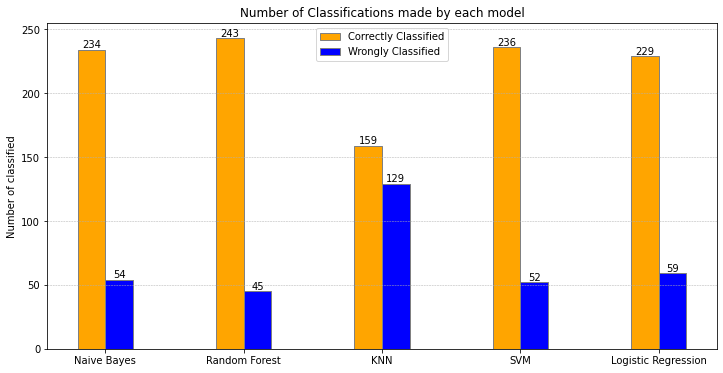

In [69]:
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 6))
 
br1 = np.arange(len(rt_classified))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, rt_classified, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Correctly Classified')
plt.bar(br2, wr_classified, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Wrongly Classified')

plt.xticks(br1 + barWidth / 2, model_names)
plt.ylabel('Number of classified')
plt.title('Number of Classifications made by each model')

plt.legend()
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Performing Cross Validation On the best Algorithm which is Decision Tree

In [73]:
y = pd.DataFrame(y)
y = y.reset_index()
result = pd.concat([X, y], axis=1)
result = result[result.iloc[:,-1] != 2]
result = result.reset_index()

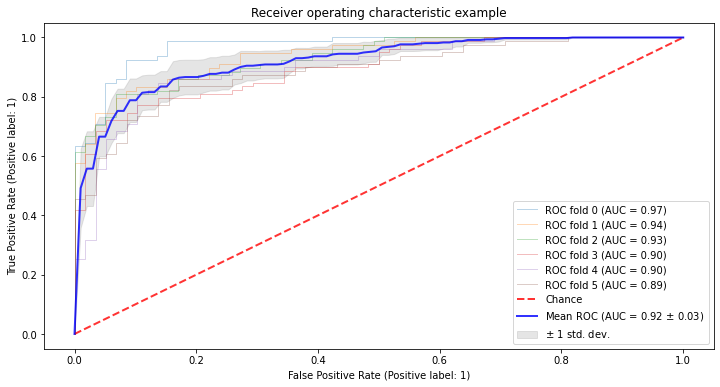

In [80]:
crs_X, crs_y = result.iloc[:,0:4], result.iloc[:,-1]
n_samples, n_features = crs_X.shape
random_state = np.random.RandomState(0)
crs_X = np.c_[crs_X, random_state.randn(n_samples, 200 * n_features)]
crs_X = preprocessing.MinMaxScaler().fit_transform(crs_X) 

cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel = 'linear', C = 1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(12, 6))
for i, (train, test) in enumerate(cv.split(crs_X, crs_y)):
    classifier.fit(crs_X[train], crs_y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        crs_X[test],
        crs_y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

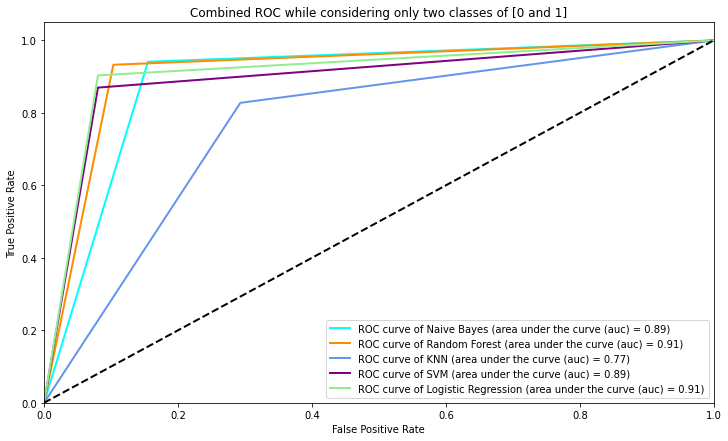

In [81]:
roc_X, roc_y = result.iloc[:,0:4], result.iloc[:,-1]
n_samples, n_features = roc_X.shape
random_state = np.random.RandomState(0)
roc_X = np.c_[roc_X, random_state.randn(n_samples, 50 * n_features)]
roc_X = preprocessing.MinMaxScaler().fit_transform(roc_X) 

X_train, X_test, y_train, y_test = train_test_split(roc_X, roc_y, test_size=0.5, random_state=0)

plt.figure(figsize=(12, 7))
colors = ["aqua", "darkorange", "cornflowerblue", "purple", "lightgreen", "lightblue"]

for i in range(0, len(models)):
    models[i].fit(X_train, y_train)
    fpr, tpr, _ = roc_curve(y_test, models[i].predict(X_test))
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=colors[i],
        lw=2,
        label="ROC curve of " + model_names[i] + " (area under the curve (auc) = {1:0.2f})".format(i, roc_auc),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC while considering only two classes of [0 and 1]")
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

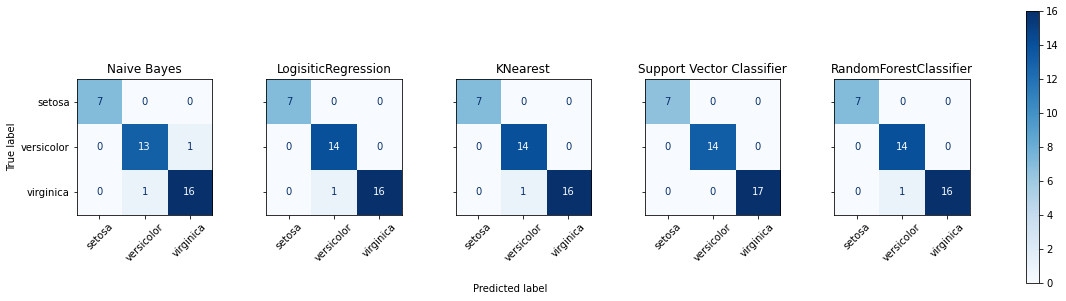

In [82]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": svm.SVC(kernel = 'linear', C = 1),
    "RandomForestClassifier": RandomForestClassifier(max_depth=2, random_state=0),
}

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)


f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix, display_labels=iris.target_names)
    disp.plot(ax=axes[i], xticks_rotation=45, cmap = 'Blues')
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

### References:
* https://scikit-learn.org/